# __COMPUTATION II: ALGORITHMS & DATA STRUCTURES__

# PROJECT

Group Name: 44

Group Members: Bernardo Caldas, David Santos, João Pedro Sousa

Student Numbers: 20231675, 20231594, 20231711

--------------------------
**Don't change or modify the order and titles of this notebook.** However, feel free to add as many cells as you want between sections.

Good luck!

# Section 1: Dataset

Read and store the dataset file provided to you (`sales_dataset_group_<X>.pkl`).

Store the dataset under the variable name `dataset`.

In [38]:
import pickle
import matplotlib.pyplot as plt
import timeit
from scipy.stats import spearmanr

In [39]:
with open('/Users/macbookpro/Desktop/Aulas/Algorithms/Assignment/sales_dataset_group_44.pkl', 'rb') as dataset:
    dataset = pickle.load(dataset)

In [40]:
# The lenght of the dataset is printed to compare its state before and after the preprocessing.

len(dataset)

1412

# Section 2: Fixing problems in the dataset

Fix here any problems you may find in the dataset while you're developing the project.

**Do not modify the dataset anywhere else except in this section!**

In [41]:
def date_preprocess(dataset):
    """
    Reconfigures the date from a string to a list.

    The following function will split the dates in the dataset
    and place the year, month and day inside a list, replacing the
    original data. It will appear as e.g. [2024, 3, 1] (2024-3-1).

    Parameters
    ----------
    dataset : dictionary
      Dataset with the sales.
    
    Returns
    -------
    dataset : list
      Dataset with each sale's date in the new format.
    """
    for sale in dataset:
        sale["Date"] = sale["Date"].split("-")
        for i in range(len(sale["Date"])):
            sale["Date"][i] = int(sale["Date"][i])

    return dataset


def preprocess(dataset):
    """
    Checks for potential errors in the dataset and fixes/removes them.

    According to what we observed in the dataset, this function will
    correct the situation where the `Unit Price` is swapped with the
    `Item`, and afterwards it will check if each key/value pair
    contains the correct data type.

    Parameters
    ----------
    dataset : list
      Dataset with the sales.

    Returns
    -------
    dataset : list
      Dataset with the sales.

    Notes
    -----
    The function will also convert to a floating-point number every
    sale whose `Unit Price` is an integer (merely for `real-world accuracy`).
    """
    for sale in dataset:
        
        if isinstance(sale['Unit Price'], str) and isinstance(sale['Item'], (float, int)):
            sale['Unit Price'], sale['Item'] = sale['Item'], sale['Unit Price']

    for sale in dataset:

        if not isinstance(sale['Quantity'], int):
            dataset.remove(sale)
        elif not isinstance(sale['Unit Price'], (float, int)):
            dataset.remove(sale)
        elif not isinstance(sale['Item'], str):
            dataset.remove(sale)

    for sale in dataset:

        if isinstance(sale['Unit Price'], int):
            sale['Unit Price'] = float(sale['Unit Price'])

    return dataset

In [42]:
preprocess(dataset)
date_preprocess(dataset)
len(dataset)

1341

Comparing the original lenght of the dataset and its lenght after the preprocessing stage, we can conclude that a total of 71 entries were removed (1412 -> 1341).

# Section 3: Extraction of Information

### Extraction of recency, frequency and monetary values

Monetary

In [43]:
def monetary(dataset):
    """
    Creates a dictionary with the total amount spent by each customer.

    Parameters
    ----------
    dataset : list
      Dataset with the sales.

    Returns
    -------
    sale_monetary : dictionary
      Dictonary with key/value pairs corresponding to the total amount
      spent by each person.
    """
    sale_monetary = {}

    for sale in dataset:
        if sale["Name"] not in sale_monetary:
            sale_monetary[sale["Name"]] = round(sale["Unit Price"] * sale["Quantity"], 2)
        else:
            sale_monetary[sale["Name"]] += round(sale["Unit Price"] * sale["Quantity"], 2)
        sale_monetary[sale["Name"]] = round(sale_monetary[sale["Name"]], 2)

    return sale_monetary

In [44]:
monetary_dict = monetary(dataset)
monetary_list = list(monetary_dict.values())

<h3></h3>
Frequency

In [45]:
def frequency(dataset):
    """
    Creates a dictionary with the total purchases made by each customer.

    Parameters
    ----------
    dataset : list
      Dataset with the sales.

    Returns
    -------
    vocab : dictionary
      Dictonary with key/value pairs corresponding to the total purchases
      made by each person.    
    """
    target = ""
    for sale in dataset:
        target += sale["Name"] + " "

    name_list = target.split()
    print(len(name_list))
    vocab = {}
    for name in name_list:
        if name not in vocab:
            vocab[name] = 1
        else:
            vocab[name] += 1
    return vocab

In [46]:
frequency_dict = frequency(dataset)
frequency_list = list(frequency_dict.values())

1341


<h3></h3>
Recency

In [47]:
def is_leap_year(year):
    """
    Checks if the sale's year is a leap year.

    Parameters
    ----------
    year : int
      Year obtained from the `date` value in each sale.

    Returns
    -------
    boolean
      True if it is a leap year, False otherwise
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)


def days_in_month(year, month):
    """
    Checks how many days there are in the 12 months of the year.

    For every sale, the function will check in which month it happened
    and return the corresponding number of days in that month.

    Parameters
    ----------
    year : int
      Year obtained from the `date` value in each sale.
    month : int
      Month obtained from the `date` value in each sale.

    Returns
    -------
    31 : int
      Number of days in months 1, 3, 5, 7, 8, 10, 12
    30 : int
      Number of days in months 4, 6, 9, 11
    29 : int
      Number of days in month 2, if it is a leap year
    28 : int
      Number of days in month 2, if it is not a leap year
    0 : int
      If above conditions are not met (should not happen!)
    """
    if month in [1, 3, 5, 7, 8, 10, 12]:
        return 31

    elif month in [4, 6, 9, 11]:
        return 30

    elif month == 2:
        return 29 if is_leap_year(year) else 28

    return 0


def days_elapsed(year, month, day):
    """
    Counts how many days have passed since the beginning of the year.

    Parameters
    ----------
    year : int
      Year obtained from the `date` value in each sale.
    month : int
      Month obtained from the `date` value in each sale.
    day : int
      Day obtained from the `date` value in each sale.

    Returns
    -------
    days : int
      Number of days elapsed since the beginning of the year.
    """
    days = 0

    for m in range(1, month):
        days += days_in_month(year, m)

    days += day

    return days


def days_between_dates(date1, date2):
    """
    Counts how many days have occurred between two dates.

    The function will resort to the previously defined functions to
    determine the difference between the latest and earliest date.

    Parameters
    ----------
    date1 : list
      Complete date obtained from the `date` in a sale (earliest).
    date2 : list
      Complete date (can be another sale's date or the date used for the
      calculations - as will happen afterwards).

    Returns
    -------
    total_days : int
      Days occurred between the two dates.
    """
    year1, month1, day1 = date1

    year2, month2, day2 = date2

    if year1 == year2:
        return days_elapsed(year2, month2, day2) - days_elapsed(year1, month1, day1)

    days_in_first_year = days_elapsed(year1, 12, 31) - days_elapsed(year1, month1, day1) + 1

    days_in_last_year = days_elapsed(year2, month2, day2)

    days_in_between_years = 0

    for year in range(year1 + 1, year2):
        days_in_between_years += 366 if is_leap_year(year) else 365

    total_days = days_in_first_year + days_in_between_years + days_in_last_year

    return total_days


def calculate_recency(dataset, current_date):
    """
    Determines the number of days between the sales' date and current date.

    The function will analyse the dataset and add a new key/value pair to
    each sale, indicating how many days have occurred between the sale and
    the current date (which will be set below as March 1st, 2024).

    Parameters
    ----------
    dataset : list
      Dataset with the sales.
    current_date : list
      List containing the year, month and day of the current date.
    
    Returns
    -------
    recency_data : dictionary
      Dictonary with key/value pairs corresponding to the lowest recency
      value associated with each person.
    """
    recency_data = {}

    for sale in dataset:
        name = sale["Name"]
        date = sale["Date"]
        recency_days = days_between_dates(date, current_date)
        sale["Recency"] = recency_days

        if name in recency_data:
            recency_data[name] = min(recency_data[name], recency_days)

        else:
            recency_data[name] = recency_days

    return recency_data

In [48]:
current_date = [2024, 3, 1]
recency_dict = calculate_recency(dataset, current_date)
recency_list = list(recency_dict.values())

### Histograms

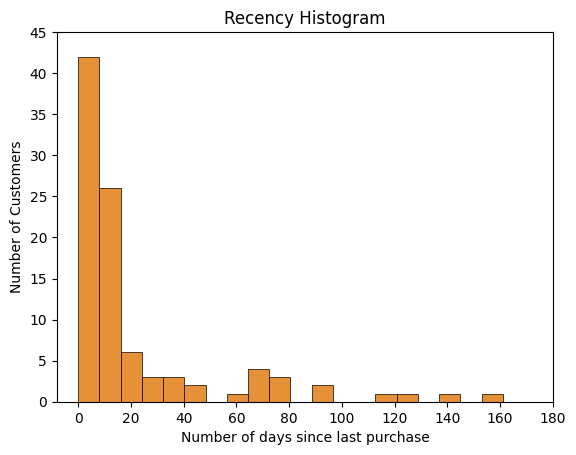

In [49]:
plt.hist(recency_list, bins = 20, color = '#e69138', edgecolor = '#000000', linewidth = 0.5)
plt.xlabel('Number of days since last purchase')
plt.ylabel('Number of Customers')
plt.title('Recency Histogram')
plt.xticks([0,20,40,60,80,100,120,140,160,180])
plt.yticks([0,5,10,15,20,25,30,35,40,45]);

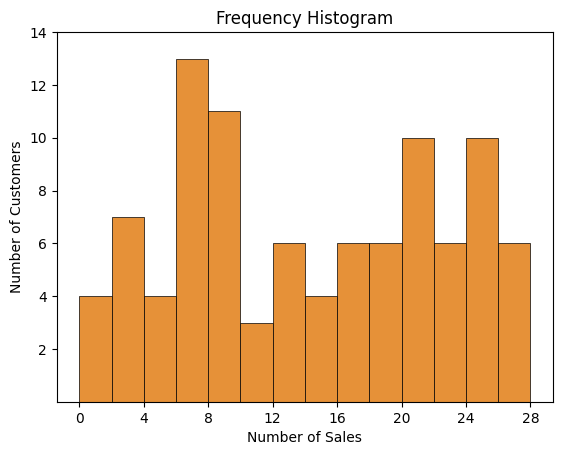

In [50]:
plt.hist(frequency_list, bins = range(0, 30, 2), color = '#e69138', edgecolor = '#000000', linewidth = 0.5)
plt.xlabel('Number of Sales')
plt.ylabel('Number of Customers')
plt.title('Frequency Histogram')
plt.xticks([0,4,8,12,16,20,24,28])
plt.yticks([2,4,6,8,10,12,14]);

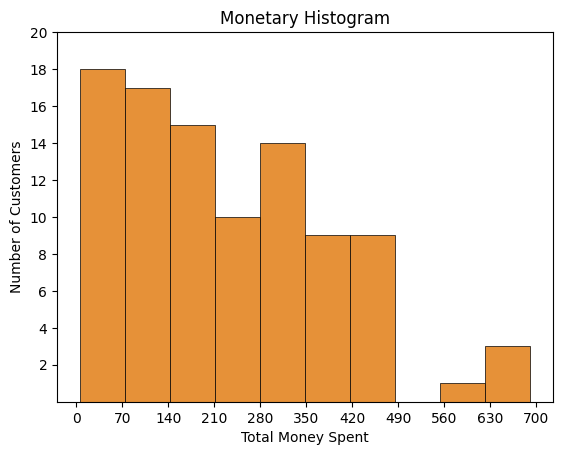

In [51]:
plt.hist(monetary_list, bins = 10, color = '#e69138', edgecolor = '#000000', linewidth = 0.5)
plt.xlabel('Total Money Spent')
plt.ylabel('Number of Customers')
plt.title('Monetary Histogram')
plt.xticks([0,70,140,210,280,350,420,490,560,630,700])
plt.yticks([2,4,6,8,10,12,14,16,18,20]);

# Section 4: Sorting

### First RFM scores (RFM)

For the sorting algorithm, we chose to use merge sort as it is the algorithm with the least complexity (O(n*log(n))).

In [103]:
# Merge in ascending order

def merge_ascending(left, right):
    """
    Merge two already sorted lists into a single sorted list.

    Parameters
    ----------
    left : list
      The first sorted list to be merged.
    right : list
      The second sorted list to be merged.

    Returns
    -------
    list
      A single list containing all elements from ´left´ and ´right´ sorted
      in ascending order.
    """
    output = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1

    return [*output, *left[i:], *right[j:]]

def merge_sort_ascending(seq):
    """
    Implements a merge sort algorithm in ascending order.

    This function splits the input list into smaller sublists which are sorted
    and then merges them in ascending order using the merge_ascending
    function.

    Parameters
    ----------
    seq : list
      List that will be sorted.
    
    Returns
    -------
    list
      The provided list, sorted in ascending order.

    Notes
    -----
    Even though this function was defined to work with integer values,
    it is also used in the Alphabetical Sorting section, since Python
    treats the alphabet as a series of ascending characters, such that
    "a" < "b", "b" < "c", et cetera.
    """
    if len(seq) == 1:
        return seq

    idx_half = len(seq) // 2
    right = merge_sort_ascending(seq[idx_half:])
    left = merge_sort_ascending(seq[:idx_half])
    return merge_ascending(left, right)

In [53]:
# Merge in descending order

def merge_descending(left, right):
    """
    Merge two already sorted lists into a single sorted list.

    Parameters
    ----------
    left : list
      The first sorted list to be merged.
    right : list
      The second sorted list to be merged.

    Returns
    -------
    list
      A single list containing all elements from ´left´ and ´right´ sorted
      in descending order.
    """
    output = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] > right[j]:
            output.append(left[i])
            i += 1
        else:
            output.append(right[j])
            j += 1

    return [*output, *left[i:], *right[j:]]

def merge_sort_descending(seq):
    """
    Implements a merge sort algorithm in descending order.

    This function splits the input list into smaller sublists which are sorted
    and then merges them in descending order using the merge_descending
    function.

    Parameters
    ----------
    seq : list
      List that will be sorted.
    
    Returns
    -------
    list
      The provided list, sorted in descending order.

    Notes
    -----
    Similarly to the merge_sort_ascending function, this can also be used
    to sort strings in reverse alphabetical order (not used in the program
    for this purpose).
    """
    if len(seq) == 1:
        return seq

    idx_half = len(seq) // 2
    right = merge_sort_descending(seq[idx_half:])
    left = merge_sort_descending(seq[:idx_half])
    return merge_descending(left, right)

In [54]:
sorted_recency_list = merge_sort_ascending(recency_list)

sorted_recency_dict = {}
for n in sorted_recency_list:
    for key in recency_dict:
        if recency_dict[key] == n and key not in sorted_recency_dict:
            sorted_recency_dict[key] = n

sorted_recency_dict

{'Márcia': 0,
 'David': 0,
 'Joana': 0,
 'Jean': 0,
 'Tomas': 0,
 'Iryna': 0,
 'Pansau': 0,
 'Lowie': 0,
 'Bruno': 0,
 'Beatriz': 0,
 'Aleksei': 1,
 'Davyd': 1,
 'Vidhi': 1,
 'Adriana': 1,
 'Henrique': 1,
 'Phat': 1,
 'Carlota': 1,
 'Carlos': 1,
 'Xinyi': 1,
 'Duarte': 2,
 'Armaan': 2,
 'Mikhail': 2,
 'Abdul': 2,
 'Beatris': 2,
 'Emmanuella': 2,
 'Iurii': 3,
 'Inês': 3,
 'Wilker': 4,
 'Gonçalo': 4,
 'Victoriya': 5,
 'Vladislav': 5,
 'Hamim': 5,
 'Bernardo': 6,
 'Jose': 6,
 'Ashool': 7,
 'Constança': 7,
 'Cecília': 7,
 'Cyrine': 7,
 'Gabriel': 7,
 'Diana': 8,
 'Diogo': 8,
 'Cicero': 8,
 'Andre': 9,
 'Komail': 9,
 'Guilherme': 9,
 'Julia': 10,
 'Maryam': 10,
 'Antónia': 11,
 'Rodrigo': 11,
 'Angelo': 11,
 'Lourenço': 11,
 'Hassan': 12,
 'Filipe': 12,
 'Sofia': 12,
 'Martim': 12,
 'Matilde': 13,
 'Francisco': 13,
 'Peter': 13,
 'Kazi': 13,
 'Artem': 13,
 'Krish': 14,
 'Fausto': 15,
 'Andrii': 15,
 'Srijan': 16,
 'Mootez': 16,
 'Antonelli': 16,
 'Juliana': 16,
 'Luis': 16,
 'Ansh': 17,
 'P

In [55]:
def assign_rfm1(y):
    """
    Assigns a score to each person for a given parameter of RFM.

    The function will split the y dictionary containing the scores for
    either recency, frequency or monetary into three equal parts and assign
    a score of 1, 2 or 3 to each part (every person with same number).

    Parameters
    ----------
    y : dictionary
      Contains the values to which the score will be assigned.

    Returns
    -------
    score : dictionary
      Contains the names of every person and their corresponding unique
      score for recency, frequency and monetary.

    Notes
    -----
    Important! The y dictionary should already contain the values sorted
    in ascending or descending order (according to what's needed).
    """
    score = {}

    third = len(y) // 3
    remainder = len(y) % 3
    first_third_n = third + (1 if remainder != 0 else 0)
    second_third_n = first_third_n + third + (1 if remainder != 0 else 0)

    for i, item in enumerate(y):
        if i < first_third_n:
            score[item] = 3
        elif i < second_third_n:
            score[item] = 2
        else:
            score[item] = 1

    return score

In [56]:
recency_score = assign_rfm1(sorted_recency_dict)
recency_score

{'Márcia': 3,
 'David': 3,
 'Joana': 3,
 'Jean': 3,
 'Tomas': 3,
 'Iryna': 3,
 'Pansau': 3,
 'Lowie': 3,
 'Bruno': 3,
 'Beatriz': 3,
 'Aleksei': 3,
 'Davyd': 3,
 'Vidhi': 3,
 'Adriana': 3,
 'Henrique': 3,
 'Phat': 3,
 'Carlota': 3,
 'Carlos': 3,
 'Xinyi': 3,
 'Duarte': 3,
 'Armaan': 3,
 'Mikhail': 3,
 'Abdul': 3,
 'Beatris': 3,
 'Emmanuella': 3,
 'Iurii': 3,
 'Inês': 3,
 'Wilker': 3,
 'Gonçalo': 3,
 'Victoriya': 3,
 'Vladislav': 3,
 'Hamim': 3,
 'Bernardo': 2,
 'Jose': 2,
 'Ashool': 2,
 'Constança': 2,
 'Cecília': 2,
 'Cyrine': 2,
 'Gabriel': 2,
 'Diana': 2,
 'Diogo': 2,
 'Cicero': 2,
 'Andre': 2,
 'Komail': 2,
 'Guilherme': 2,
 'Julia': 2,
 'Maryam': 2,
 'Antónia': 2,
 'Rodrigo': 2,
 'Angelo': 2,
 'Lourenço': 2,
 'Hassan': 2,
 'Filipe': 2,
 'Sofia': 2,
 'Martim': 2,
 'Matilde': 2,
 'Francisco': 2,
 'Peter': 2,
 'Kazi': 2,
 'Artem': 2,
 'Krish': 2,
 'Fausto': 2,
 'Andrii': 2,
 'Srijan': 2,
 'Mootez': 1,
 'Antonelli': 1,
 'Juliana': 1,
 'Luis': 1,
 'Ansh': 1,
 'Pedro': 1,
 'Joao': 1,
 '

In [57]:
sorted_frequency_list = merge_sort_descending(frequency_list)

In [58]:
sorted_frequency_dict = {}
for n in sorted_frequency_list:
    for key in frequency_dict:
        if frequency_dict[key] == n and key not in sorted_frequency_dict:
            sorted_frequency_dict[key] = n

sorted_frequency_dict

{'Angelo': 28,
 'Carlos': 28,
 'Antónia': 27,
 'Emmanuella': 27,
 'Diana': 26,
 'Carlota': 26,
 'Henrique': 25,
 'Srijan': 25,
 'Cyrine': 25,
 'Vidhi': 24,
 'David': 24,
 'Victoriya': 24,
 'Joana': 24,
 'Vladislav': 24,
 'María': 24,
 'Krish': 24,
 'Davyd': 23,
 'Armaan': 22,
 'Mikhail': 22,
 'Inês': 22,
 'Miguel': 22,
 'Cicero': 22,
 'Pedro': 21,
 'Adriana': 21,
 'Abdul': 21,
 'Rita': 21,
 'Ansh': 21,
 'Xinyi': 21,
 'Komail': 20,
 'Wilker': 20,
 'Beatris': 20,
 'Gonçalo': 20,
 'Aleksei': 19,
 'Duarte': 19,
 'Jean': 19,
 'Constança': 18,
 'Márcia': 18,
 'Madalena': 18,
 'Ashool': 17,
 'Hamim': 17,
 'Jose': 17,
 'Andre': 16,
 'Joao': 16,
 'Tomas': 16,
 'Iurii': 15,
 'Rodrigo': 15,
 'Pansau': 14,
 'Lourenço': 14,
 'Darija': 13,
 'Matilde': 13,
 'Diogo': 13,
 'Hassan': 12,
 'Martim': 12,
 'Andrey': 12,
 'Henry': 11,
 'Iryna': 10,
 'Bruno': 10,
 'Julia': 9,
 'Andrii': 9,
 'Filipe': 9,
 'Mootez': 9,
 'Tiago': 9,
 'Cecília': 9,
 'Luis': 9,
 'Eduardo': 8,
 'Bernardo': 8,
 'Phat': 8,
 'Beatriz

In [59]:
frequency_score = assign_rfm1(sorted_frequency_dict)
frequency_score

{'Angelo': 3,
 'Carlos': 3,
 'Antónia': 3,
 'Emmanuella': 3,
 'Diana': 3,
 'Carlota': 3,
 'Henrique': 3,
 'Srijan': 3,
 'Cyrine': 3,
 'Vidhi': 3,
 'David': 3,
 'Victoriya': 3,
 'Joana': 3,
 'Vladislav': 3,
 'María': 3,
 'Krish': 3,
 'Davyd': 3,
 'Armaan': 3,
 'Mikhail': 3,
 'Inês': 3,
 'Miguel': 3,
 'Cicero': 3,
 'Pedro': 3,
 'Adriana': 3,
 'Abdul': 3,
 'Rita': 3,
 'Ansh': 3,
 'Xinyi': 3,
 'Komail': 3,
 'Wilker': 3,
 'Beatris': 3,
 'Gonçalo': 3,
 'Aleksei': 2,
 'Duarte': 2,
 'Jean': 2,
 'Constança': 2,
 'Márcia': 2,
 'Madalena': 2,
 'Ashool': 2,
 'Hamim': 2,
 'Jose': 2,
 'Andre': 2,
 'Joao': 2,
 'Tomas': 2,
 'Iurii': 2,
 'Rodrigo': 2,
 'Pansau': 2,
 'Lourenço': 2,
 'Darija': 2,
 'Matilde': 2,
 'Diogo': 2,
 'Hassan': 2,
 'Martim': 2,
 'Andrey': 2,
 'Henry': 2,
 'Iryna': 2,
 'Bruno': 2,
 'Julia': 2,
 'Andrii': 2,
 'Filipe': 2,
 'Mootez': 2,
 'Tiago': 2,
 'Cecília': 2,
 'Luis': 2,
 'Eduardo': 1,
 'Bernardo': 1,
 'Phat': 1,
 'Beatriz': 1,
 'Maria': 1,
 'Laura': 1,
 'Vasco': 1,
 'Francisco'

In [60]:
sorted_monetary_list = merge_sort_descending(monetary_list)

In [61]:
sorted_monetary_dict = {}
for n in sorted_monetary_list:
    for key in monetary_dict:
        if monetary_dict[key] == n and key not in sorted_monetary_dict:
            sorted_monetary_dict[key] = n

sorted_monetary_dict

{'Adriana': 691.6,
 'Antónia': 664.1,
 'Komail': 658.4,
 'Carlos': 599.6,
 'Xinyi': 461.2,
 'David': 450.1,
 'Krish': 446.8,
 'Rita': 439.4,
 'Vidhi': 435.5,
 'Jose': 434.1,
 'Angelo': 432.2,
 'Joao': 425.5,
 'Davyd': 423.2,
 'Henrique': 410.2,
 'Victoriya': 405.1,
 'Madalena': 395.6,
 'Abdul': 389.5,
 'Cicero': 386.0,
 'Pedro': 381.5,
 'Rodrigo': 380.4,
 'Miguel': 352.2,
 'Inês': 349.1,
 'Vladislav': 347.9,
 'Joana': 345.1,
 'Cyrine': 343.7,
 'Andre': 340.7,
 'Aleksei': 340.4,
 'Tomas': 328.7,
 'Jean': 328.4,
 'Duarte': 325.9,
 'Srijan': 324.9,
 'Matilde': 307.2,
 'Constança': 303.7,
 'Diana': 295.2,
 'Wilker': 294.7,
 'Darija': 282.0,
 'Andrey': 276.5,
 'Emmanuella': 256.7,
 'Márcia': 234.8,
 'Iurii': 228.6,
 'Lourenço': 222.3,
 'Gonçalo': 219.0,
 'Hamim': 215.8,
 'Carlota': 214.5,
 'Henry': 214.5,
 'Armaan': 213.2,
 'Ansh': 199.8,
 'Pansau': 198.1,
 'Mariana': 196.0,
 'Sofia': 188.7,
 'Juliana': 187.9,
 'María': 174.0,
 'Beatriz': 170.4,
 'Hassan': 167.9,
 'Diogo': 165.8,
 'Phat': 1

In [62]:
monetary_score = assign_rfm1(sorted_monetary_dict)
monetary_score

{'Adriana': 3,
 'Antónia': 3,
 'Komail': 3,
 'Carlos': 3,
 'Xinyi': 3,
 'David': 3,
 'Krish': 3,
 'Rita': 3,
 'Vidhi': 3,
 'Jose': 3,
 'Angelo': 3,
 'Joao': 3,
 'Davyd': 3,
 'Henrique': 3,
 'Victoriya': 3,
 'Madalena': 3,
 'Abdul': 3,
 'Cicero': 3,
 'Pedro': 3,
 'Rodrigo': 3,
 'Miguel': 3,
 'Inês': 3,
 'Vladislav': 3,
 'Joana': 3,
 'Cyrine': 3,
 'Andre': 3,
 'Aleksei': 3,
 'Tomas': 3,
 'Jean': 3,
 'Duarte': 3,
 'Srijan': 3,
 'Matilde': 3,
 'Constança': 2,
 'Diana': 2,
 'Wilker': 2,
 'Darija': 2,
 'Andrey': 2,
 'Emmanuella': 2,
 'Márcia': 2,
 'Iurii': 2,
 'Lourenço': 2,
 'Gonçalo': 2,
 'Hamim': 2,
 'Carlota': 2,
 'Henry': 2,
 'Armaan': 2,
 'Ansh': 2,
 'Pansau': 2,
 'Mariana': 2,
 'Sofia': 2,
 'Juliana': 2,
 'María': 2,
 'Beatriz': 2,
 'Hassan': 2,
 'Diogo': 2,
 'Phat': 2,
 'Mikhail': 2,
 'Martim': 2,
 'Beatris': 2,
 'Bruno': 2,
 'Bernardo': 2,
 'Laura': 2,
 'Bhawna': 2,
 'Filipe': 2,
 'Francisco': 1,
 'Andrii': 1,
 'Ashool': 1,
 'Maryam': 1,
 'Eduardo': 1,
 'Antonelli': 1,
 'Peter': 1,


In [63]:
def get_rfm1_score(recency_score, frequency_score, monetary_score):
    """
    Obtains the final RFM score for each customer.

    The function will print the RFM scores using formatted print
    and then convert the results to an integer.

    Parameters
    ----------
    recency_score : dictionary
      Dictionary with the recency values per person.
    frequency_score : dictionary
      Dictionary with the frequency values per person.
    monetary_score : dictionary
      Dictionary with the monetary values per person.
    
    Returns
    -------
    rfm_score : dictionary
      Dictionary containing all RFM scores, unsorted.
    """    
    rfm_score = {}
    for person in recency_score:
        rfm_score[person] = int(f"{recency_score[person]}{frequency_score[person]}{monetary_score[person]}")

    return rfm_score


def sort_rfm1_score(rfm_score):
    """
    Sorts the RFM dictionary obtained with the function get_rfm1_score.

    The function will sort the RFM dictionary using the
    merge_sort_descending algorithm and return a new dictionary with
    the sorted names.

    Parameters
    ----------
    rfm_score : dictionary
      Dictionary with unsorted RFM scores.

    Returns
    -------
    rfm1 : dictionary
      Dictionary with sorted RFM scores.
    """
    list_rfm_score = list(rfm_score.values())
    sorted_rfm_score = merge_sort_descending(list_rfm_score)
    rfm1 = {}
    for n in sorted_rfm_score:
        for key in rfm_score:
            if rfm_score[key] == n and key not in rfm1:
                rfm1[key] = n

    return rfm1

rfm1_score = get_rfm1_score(recency_score, frequency_score, monetary_score)
rfm1 = sort_rfm1_score(rfm1_score)
rfm1

{'David': 333,
 'Joana': 333,
 'Davyd': 333,
 'Vidhi': 333,
 'Adriana': 333,
 'Henrique': 333,
 'Carlos': 333,
 'Xinyi': 333,
 'Abdul': 333,
 'Inês': 333,
 'Victoriya': 333,
 'Vladislav': 333,
 'Carlota': 332,
 'Armaan': 332,
 'Mikhail': 332,
 'Beatris': 332,
 'Emmanuella': 332,
 'Wilker': 332,
 'Gonçalo': 332,
 'Jean': 323,
 'Tomas': 323,
 'Aleksei': 323,
 'Duarte': 323,
 'Márcia': 322,
 'Pansau': 322,
 'Bruno': 322,
 'Iurii': 322,
 'Hamim': 322,
 'Iryna': 321,
 'Beatriz': 312,
 'Phat': 312,
 'Lowie': 311,
 'Cyrine': 233,
 'Cicero': 233,
 'Komail': 233,
 'Antónia': 233,
 'Angelo': 233,
 'Krish': 233,
 'Srijan': 233,
 'Diana': 232,
 'Jose': 223,
 'Andre': 223,
 'Rodrigo': 223,
 'Matilde': 223,
 'Constança': 222,
 'Diogo': 222,
 'Lourenço': 222,
 'Hassan': 222,
 'Filipe': 222,
 'Martim': 222,
 'Ashool': 221,
 'Cecília': 221,
 'Julia': 221,
 'Andrii': 221,
 'Bernardo': 212,
 'Sofia': 212,
 'Gabriel': 211,
 'Guilherme': 211,
 'Maryam': 211,
 'Francisco': 211,
 'Peter': 211,
 'Kazi': 211,


- Can you determine which students are most valuable to our SU, considering that our
organization is evil and values students solely based on their purchase history?

Answer:

In [64]:
best = ""
for student in rfm1:
    if rfm1[student] == 333:
        best += student + ", "

print(f"{best[:-2]} are the most valuable students to the SU.")

David, Joana, Davyd, Vidhi, Adriana, Henrique, Carlos, Xinyi, Abdul, Inês, Victoriya, Vladislav are the most valuable students to the SU.


### Second RFM Scores (RFM')

In [65]:
def assign_rfm2(y):
    """
    Separates existing buckets into three different ones for RFM'.

    The function separates existing buckets into three equally-sized buckets
    (n * 3) and assigns a score of 1, 2 and 3 based on the corresponding
    values for recency, frequency and monetary.

    Parameters
    ----------
    x : dictionary
      Dictionary corresponding to a single bucket.
    
    Returns
    -------
    list
      List containing the 3 new buckets.
    """
    first_third = {}
    second_third = {}
    last_third = {}

    third = len(y) // 3
    remainder = len(y) % 3
    first_third_n = third + (1 if remainder != 0 else 0)
    second_third_n = first_third_n + third + (1 if remainder != 0 else 0)

    for i, item in enumerate(y):
        if i < first_third_n:
            first_third[item] = 3
        elif i < second_third_n:
            second_third[item] = 2
        else:
            last_third[item] = 1

    return [first_third, second_third, last_third]

In [66]:
recency_buckets = assign_rfm2(sorted_recency_dict)
recency_buckets

[{'Márcia': 3,
  'David': 3,
  'Joana': 3,
  'Jean': 3,
  'Tomas': 3,
  'Iryna': 3,
  'Pansau': 3,
  'Lowie': 3,
  'Bruno': 3,
  'Beatriz': 3,
  'Aleksei': 3,
  'Davyd': 3,
  'Vidhi': 3,
  'Adriana': 3,
  'Henrique': 3,
  'Phat': 3,
  'Carlota': 3,
  'Carlos': 3,
  'Xinyi': 3,
  'Duarte': 3,
  'Armaan': 3,
  'Mikhail': 3,
  'Abdul': 3,
  'Beatris': 3,
  'Emmanuella': 3,
  'Iurii': 3,
  'Inês': 3,
  'Wilker': 3,
  'Gonçalo': 3,
  'Victoriya': 3,
  'Vladislav': 3,
  'Hamim': 3},
 {'Bernardo': 2,
  'Jose': 2,
  'Ashool': 2,
  'Constança': 2,
  'Cecília': 2,
  'Cyrine': 2,
  'Gabriel': 2,
  'Diana': 2,
  'Diogo': 2,
  'Cicero': 2,
  'Andre': 2,
  'Komail': 2,
  'Guilherme': 2,
  'Julia': 2,
  'Maryam': 2,
  'Antónia': 2,
  'Rodrigo': 2,
  'Angelo': 2,
  'Lourenço': 2,
  'Hassan': 2,
  'Filipe': 2,
  'Sofia': 2,
  'Martim': 2,
  'Matilde': 2,
  'Francisco': 2,
  'Peter': 2,
  'Kazi': 2,
  'Artem': 2,
  'Krish': 2,
  'Fausto': 2,
  'Andrii': 2,
  'Srijan': 2},
 {'Mootez': 1,
  'Antonelli': 1

In [67]:
for element in recency_buckets:
    for name in element:
        if name in frequency_score:
                element[name] = frequency_score[name]

grab_frequency_score = []
for element in recency_buckets:
    a = merge_sort_descending(list(element.values()))
    b = {}
    for n in a:
        for key in element:
            if element[key] == n and key not in b:
                b[key] = n
    grab_frequency_score.append(b)

In [68]:
grab_frequency_score

[{'David': 3,
  'Joana': 3,
  'Davyd': 3,
  'Vidhi': 3,
  'Adriana': 3,
  'Henrique': 3,
  'Carlota': 3,
  'Carlos': 3,
  'Xinyi': 3,
  'Armaan': 3,
  'Mikhail': 3,
  'Abdul': 3,
  'Beatris': 3,
  'Emmanuella': 3,
  'Inês': 3,
  'Wilker': 3,
  'Gonçalo': 3,
  'Victoriya': 3,
  'Vladislav': 3,
  'Márcia': 2,
  'Jean': 2,
  'Tomas': 2,
  'Iryna': 2,
  'Pansau': 2,
  'Bruno': 2,
  'Aleksei': 2,
  'Duarte': 2,
  'Iurii': 2,
  'Hamim': 2,
  'Lowie': 1,
  'Beatriz': 1,
  'Phat': 1},
 {'Cyrine': 3,
  'Diana': 3,
  'Cicero': 3,
  'Komail': 3,
  'Antónia': 3,
  'Angelo': 3,
  'Krish': 3,
  'Srijan': 3,
  'Jose': 2,
  'Ashool': 2,
  'Constança': 2,
  'Cecília': 2,
  'Diogo': 2,
  'Andre': 2,
  'Julia': 2,
  'Rodrigo': 2,
  'Lourenço': 2,
  'Hassan': 2,
  'Filipe': 2,
  'Martim': 2,
  'Matilde': 2,
  'Andrii': 2,
  'Bernardo': 1,
  'Gabriel': 1,
  'Guilherme': 1,
  'Maryam': 1,
  'Sofia': 1,
  'Francisco': 1,
  'Peter': 1,
  'Kazi': 1,
  'Artem': 1,
  'Fausto': 1},
 {'Ansh': 3,
  'Pedro': 3,
  'M

In [69]:
frequency_buckets = []
for element in grab_frequency_score:
    c = assign_rfm2(element)
    frequency_buckets.append(c)

In [70]:
frequency_buckets

[[{'David': 3,
   'Joana': 3,
   'Davyd': 3,
   'Vidhi': 3,
   'Adriana': 3,
   'Henrique': 3,
   'Carlota': 3,
   'Carlos': 3,
   'Xinyi': 3,
   'Armaan': 3,
   'Mikhail': 3},
  {'Abdul': 2,
   'Beatris': 2,
   'Emmanuella': 2,
   'Inês': 2,
   'Wilker': 2,
   'Gonçalo': 2,
   'Victoriya': 2,
   'Vladislav': 2,
   'Márcia': 2,
   'Jean': 2,
   'Tomas': 2},
  {'Iryna': 1,
   'Pansau': 1,
   'Bruno': 1,
   'Aleksei': 1,
   'Duarte': 1,
   'Iurii': 1,
   'Hamim': 1,
   'Lowie': 1,
   'Beatriz': 1,
   'Phat': 1}],
 [{'Cyrine': 3,
   'Diana': 3,
   'Cicero': 3,
   'Komail': 3,
   'Antónia': 3,
   'Angelo': 3,
   'Krish': 3,
   'Srijan': 3,
   'Jose': 3,
   'Ashool': 3,
   'Constança': 3},
  {'Cecília': 2,
   'Diogo': 2,
   'Andre': 2,
   'Julia': 2,
   'Rodrigo': 2,
   'Lourenço': 2,
   'Hassan': 2,
   'Filipe': 2,
   'Martim': 2,
   'Matilde': 2,
   'Andrii': 2},
  {'Bernardo': 1,
   'Gabriel': 1,
   'Guilherme': 1,
   'Maryam': 1,
   'Sofia': 1,
   'Francisco': 1,
   'Peter': 1,
   'Kazi

In [71]:
for sublist in frequency_buckets:
    for dictionary in sublist:
        for key in dictionary:
            if key in monetary_score:
                dictionary[key] = monetary_score[key]

grab_monetary_score = []
for element in frequency_buckets:
    for element2 in element:
        d = merge_sort_descending(list(element2.values()))
        e = {}
        for n in d:
            for key in element2:
                if element2[key] == n and key not in e:
                    e[key] = n
        grab_monetary_score.append(e)

In [72]:
grab_monetary_score

[{'David': 3,
  'Joana': 3,
  'Davyd': 3,
  'Vidhi': 3,
  'Adriana': 3,
  'Henrique': 3,
  'Carlos': 3,
  'Xinyi': 3,
  'Carlota': 2,
  'Armaan': 2,
  'Mikhail': 2},
 {'Abdul': 3,
  'Inês': 3,
  'Victoriya': 3,
  'Vladislav': 3,
  'Jean': 3,
  'Tomas': 3,
  'Beatris': 2,
  'Emmanuella': 2,
  'Wilker': 2,
  'Gonçalo': 2,
  'Márcia': 2},
 {'Aleksei': 3,
  'Duarte': 3,
  'Pansau': 2,
  'Bruno': 2,
  'Iurii': 2,
  'Hamim': 2,
  'Beatriz': 2,
  'Phat': 2,
  'Iryna': 1,
  'Lowie': 1},
 {'Cyrine': 3,
  'Cicero': 3,
  'Komail': 3,
  'Antónia': 3,
  'Angelo': 3,
  'Krish': 3,
  'Srijan': 3,
  'Jose': 3,
  'Diana': 2,
  'Constança': 2,
  'Ashool': 1},
 {'Andre': 3,
  'Rodrigo': 3,
  'Matilde': 3,
  'Diogo': 2,
  'Lourenço': 2,
  'Hassan': 2,
  'Filipe': 2,
  'Martim': 2,
  'Cecília': 1,
  'Julia': 1,
  'Andrii': 1},
 {'Bernardo': 2,
  'Sofia': 2,
  'Gabriel': 1,
  'Guilherme': 1,
  'Maryam': 1,
  'Francisco': 1,
  'Peter': 1,
  'Kazi': 1,
  'Artem': 1,
  'Fausto': 1},
 {'Pedro': 3,
  'Miguel': 3

In [73]:
monetary_buckets = []
for element in grab_monetary_score:
    z = assign_rfm2(element)
    monetary_buckets.append(z)

In [74]:
monetary_buckets

[[{'David': 3, 'Joana': 3, 'Davyd': 3, 'Vidhi': 3},
  {'Adriana': 2, 'Henrique': 2, 'Carlos': 2, 'Xinyi': 2},
  {'Carlota': 1, 'Armaan': 1, 'Mikhail': 1}],
 [{'Abdul': 3, 'Inês': 3, 'Victoriya': 3, 'Vladislav': 3},
  {'Jean': 2, 'Tomas': 2, 'Beatris': 2, 'Emmanuella': 2},
  {'Wilker': 1, 'Gonçalo': 1, 'Márcia': 1}],
 [{'Aleksei': 3, 'Duarte': 3, 'Pansau': 3, 'Bruno': 3},
  {'Iurii': 2, 'Hamim': 2, 'Beatriz': 2, 'Phat': 2},
  {'Iryna': 1, 'Lowie': 1}],
 [{'Cyrine': 3, 'Cicero': 3, 'Komail': 3, 'Antónia': 3},
  {'Angelo': 2, 'Krish': 2, 'Srijan': 2, 'Jose': 2},
  {'Diana': 1, 'Constança': 1, 'Ashool': 1}],
 [{'Andre': 3, 'Rodrigo': 3, 'Matilde': 3, 'Diogo': 3},
  {'Lourenço': 2, 'Hassan': 2, 'Filipe': 2, 'Martim': 2},
  {'Cecília': 1, 'Julia': 1, 'Andrii': 1}],
 [{'Bernardo': 3, 'Sofia': 3, 'Gabriel': 3, 'Guilherme': 3},
  {'Maryam': 2, 'Francisco': 2, 'Peter': 2, 'Kazi': 2},
  {'Artem': 1, 'Fausto': 1}],
 [{'Pedro': 3, 'Miguel': 3, 'Rita': 3, 'Joao': 3},
  {'Madalena': 2, 'Ansh': 2, 'Ma

In [75]:
def flatten(recency_buckets, frequency_buckets, monetary_buckets):
    """
    Flattens the buckets for recency, frequency and monetary.

    The function creates three new dictionaries containing the information
    in the buckets, but without any separation.

    Parameters
    ----------
    recency_buckets : list
      List containing the recency score with buckets.
    frequency_buckets : list
      List containing the frequency score with buckets.
    monetary_buckets : list
      List containing the monetary score with buckets.

    Returns
    -------
    list
      List containing the flattened recency, frequency and monetary scores.
    """
    flat_recency = {}
    for buck in recency_buckets:
        for name in buck:
            flat_recency[name] = buck[name]

    flat_frequency = {}
    for sublist in frequency_buckets:
        for buck in sublist:
            for name in buck:
                flat_frequency[name] = buck[name]

    flat_monetary = {}
    for sublist in monetary_buckets:
        for buck in sublist:
            for name in buck:
                flat_monetary[name] = buck[name]

    return [flat_recency, flat_frequency, flat_monetary]

In [76]:
flattened = flatten(recency_buckets, frequency_buckets, monetary_buckets)

def get_rfm2_score(flattened):
    """
    Obtains the final RFM score for each customer.

    The function will print the RFM scores using formatted print
    and then convert the results to an integer.

    Parameters
    ----------
    recency_score : dictionary
      Dictionary with the recency values per person.
    frequency_score : dictionary
      Dictionary with the frequency values per person.
    monetary_score : dictionary
      Dictionary with the monetary values per person.
    
    Returns
    -------
    rfm_score : dictionary
      Dictionary containing all RFM scores, unsorted.
    """
    rfm2_score = {}
    for flat in flattened:
        for key in flat:
            if key in rfm2_score:
                rfm2_score[key] += str(flat[key])
            else:
                rfm2_score[key] = str(flat[key])

    for key in rfm2_score:
        rfm2_score[key] = int(rfm2_score[key])
                
    return rfm2_score


def sort_rfm2_score(rfm2_score):
    """
    Sorts the RFM` dictionary obtained with the function get_rfm2_score.

    The function will sort the RFM` dictionary using the
    merge_sort_descending algorithm and return a new dictionary with
    the sorted names.

    Parameters
    ----------
    rfm_score : dictionary
      Dictionary with unsorted RFM`scores.

    Returns
    -------
    rfm1 : dictionary
      Dictionary with sorted RFM` scores.
    """    
    list_rfm2_score = list(rfm2_score.values())
    sorted_rfm2_score = merge_sort_descending(list_rfm2_score)
    rfm2 = {}
    for n in sorted_rfm2_score:
        for key in rfm2_score:
            if rfm2_score[key] == n and key not in rfm2:
                rfm2[key] = n

    return rfm2

rfm2_score = get_rfm2_score(flattened)
rfm2 = sort_rfm2_score(rfm2_score)
rfm2

{'David': 333,
 'Joana': 333,
 'Davyd': 333,
 'Vidhi': 333,
 'Abdul': 333,
 'Inês': 333,
 'Victoriya': 333,
 'Vladislav': 333,
 'Cyrine': 333,
 'Cicero': 333,
 'Komail': 333,
 'Antónia': 333,
 'Pedro': 333,
 'Miguel': 333,
 'Rita': 333,
 'Adriana': 332,
 'Henrique': 332,
 'Carlos': 332,
 'Xinyi': 332,
 'Angelo': 332,
 'Krish': 332,
 'Srijan': 332,
 'Beatris': 322,
 'Emmanuella': 322,
 'Ansh': 322,
 'María': 322,
 'Carlota': 321,
 'Armaan': 321,
 'Mikhail': 321,
 'Wilker': 321,
 'Gonçalo': 321,
 'Diana': 321,
 'Aleksei': 233,
 'Duarte': 233,
 'Andre': 233,
 'Rodrigo': 233,
 'Matilde': 233,
 'Joao': 233,
 'Jean': 232,
 'Tomas': 232,
 'Jose': 232,
 'Madalena': 232,
 'Pansau': 223,
 'Bruno': 223,
 'Diogo': 223,
 'Darija': 223,
 'Iurii': 222,
 'Hamim': 222,
 'Lourenço': 222,
 'Hassan': 222,
 'Filipe': 222,
 'Martim': 222,
 'Andrey': 222,
 'Márcia': 221,
 'Constança': 221,
 'Henry': 221,
 'Tiago': 213,
 'Iryna': 211,
 'Ashool': 211,
 'Cecília': 211,
 'Julia': 211,
 'Andrii': 211,
 'Mootez': 

### Correlation

In [102]:
correlation = spearmanr(list(rfm1.values()), list(rfm2.values()))[0]

print(f"The Spearman Rank Correlation of the first and second RFM scores is equal to {round(correlation,6)}.")

The Spearman Rank Correlation of the first and second RFM scores is equal to 0.993538.


# Section 5: Searching

### Linear Search

In [79]:
def search_linear(rfm1_score, person):
    """
    Performs a linear search for a name in the RFM dictionary.

    The function iterates through the names in the RFM scores' dictionary
    and returns the score corresponding to the desired person.
    
    Parameters
    ----------
    rfm1 : dictionary
      Dictionary containing the RFM scores for each person.
    person : string
      String with the name of the desired person.

    Returns
    -------
    rfm : int
      RFM score of the searched customer.
    -1 : int
      Returned if the name is not an actual customer (in the dictionary).
    """    
    for p, rfm in rfm1_score.items():
        if p == person:
            return rfm
    return -1

- Who do you think is the best student/customer among your group?

In [80]:
rfm_bernardo = search_linear(rfm1_score, "Bernardo")

In [81]:
rfm_david = search_linear(rfm1_score, "David")

In [82]:
rfm_joao = search_linear(rfm1_score, "João")

In [83]:
group = {"Bernardo": rfm_bernardo,"David": rfm_david, "João": rfm_joao}

Answer:

In [84]:
def best(group):
    """
    Finds the person in the group with the best RFM score.

    Parameters
    ----------
    group : dictionary
      Dictionary with the group's members and respective RFM score.
    
    Returns
    -------
    string
      Formatted print with the best person's name and its RFM score.
    """
    maxx = 0
    best_person = None
    for name, rfm in group.items():
        if rfm > maxx:
            maxx = rfm
            best_person = name

    return f"The best customer in our group is {best_person} with RFM {maxx}."

In [85]:
best(group)

'The best customer in our group is David with RFM 333.'

### Alphabetical Sorting

In [86]:
def people_list(dataset):
    """
    Creates a list with all the customer's names.

    Parameters
    ----------
    dataset : list
      Dataset with the sales.

    Returns
    -------
    final : list
      List containing all the customer's names.
    """
    final = []
    for item in dataset:
        name = item["Name"]
        if name not in final:
            final.append(name)

    return final

In [87]:
people_list = people_list(dataset)
people_list

['Hassan',
 'Diana',
 'Pedro',
 'Aleksei',
 'Maria',
 'Andre',
 'Ashool',
 'Davyd',
 'Constança',
 'Vidhi',
 'Antónia',
 'Duarte',
 'Iurii',
 'Julia',
 'Komail',
 'Armaan',
 'Adriana',
 'Márcia',
 'Wilker',
 'Eduardo',
 'Darija',
 'David',
 'Bernardo',
 'Rodrigo',
 'Angelo',
 'Mikhail',
 'Abdul',
 'Inês',
 'Beatris',
 'Victoriya',
 'Joana',
 'Matilde',
 'Jean',
 'Vladislav',
 'Hamim',
 'Henrique',
 'Fausto',
 'Joao',
 'Srijan',
 'Madalena',
 'Gonçalo',
 'María',
 'Miguel',
 'Laura',
 'Phat',
 'Emmanuella',
 'Carlota',
 'André',
 'Tomas',
 'Diogo',
 'Carlos',
 'Rita',
 'Andrii',
 'Filipe',
 'Guilherme',
 'Cicero',
 'Henry',
 'Jose',
 'Mootez',
 'Vasco',
 'Tiago',
 'Francisco',
 'Marta',
 'Peter',
 'Iryna',
 'Pansau',
 'Ansh',
 'Carolina',
 'Bhawna',
 'Antonelli',
 'Krish',
 'Sofia',
 'Kazi',
 'Lowie',
 'Cecília',
 'Lourenço',
 'Mariana',
 'Xinyi',
 'João',
 'Bruno',
 'Juliana',
 'Martim',
 'Luis',
 'Cyrine',
 'Catarina',
 'Beatriz',
 'Rijan',
 'Maryam',
 'Gabriel',
 'Zain',
 'Andrey',
 

In [97]:
# As previously mentioned, Python treats the alphabet as numbers, therefore the merge sort algorithm we defined can also be used for strings, as are the customers' names.

alpha_sort = merge_sort_ascending(people_list)
alpha_sort

['Abdul',
 'Adriana',
 'Aleksei',
 'Alexandre',
 'Andre',
 'Andrey',
 'Andrii',
 'André',
 'Angelo',
 'Ansh',
 'Antonelli',
 'Antónia',
 'Armaan',
 'Artem',
 'Ashool',
 'Beatris',
 'Beatriz',
 'Bernardo',
 'Bhawna',
 'Bruno',
 'Carlos',
 'Carlota',
 'Carolina',
 'Catarina',
 'Cecília',
 'Cicero',
 'Constança',
 'Cyrine',
 'Darija',
 'David',
 'Davyd',
 'Diana',
 'Diogo',
 'Duarte',
 'Eduardo',
 'Emmanuella',
 'Fausto',
 'Filipe',
 'Francisco',
 'Gabriel',
 'Gonçalo',
 'Guilherme',
 'Hamim',
 'Hassan',
 'Henrique',
 'Henry',
 'Inês',
 'Iryna',
 'Iurii',
 'Jean',
 'Joana',
 'Joao',
 'Jose',
 'João',
 'Julia',
 'Juliana',
 'Kazi',
 'Khadija',
 'Komail',
 'Krish',
 'Laura',
 'Leonor',
 'Lourenço',
 'Lowie',
 'Luis',
 'Madalena',
 'Maria',
 'Mariana',
 'Marta',
 'Martim',
 'Maryam',
 'María',
 'Matilde',
 'Miguel',
 'Mikhail',
 'Mootez',
 'Márcia',
 'Pansau',
 'Pedro',
 'Peter',
 'Phat',
 'Rijan',
 'Rita',
 'Rodrigo',
 'Sofia',
 'Srijan',
 'Tiago',
 'Tomas',
 'Tomás',
 'Vasco',
 'Victoriya'

### Binary Search

In [89]:
def search_binary_rec(rfm1, alpha_sort, person, idx_start, idx_end):
    """
    Performs a binary search for a name in the RFM dictionary.

    The function uses a recursive binary search algorithm to find the RFM
    value of a person in the alpha_sort list. The search is done between
    indices idx_start and idx_end.
    
    Parameters
    ----------
    rfm1 : dictionary
      Dictionary containing the RFM scores for each person.
    alpha_sort : list
      List with all customers' names.
    person : string
      Name of the person to be searched.
    idx_start : int
      Starting index of the search interval.
    idx_end : int
      Ending index of the search interval.

    Returns
    -------
    int
      RFM score of the searched customer if found. Otherwise, returns -1.
    """
    if idx_start > idx_end:
        return - 1
    else:
        idx_half = (idx_start + idx_end) // 2
        if person == alpha_sort[idx_half]:
            return rfm1[alpha_sort[idx_half]]
        elif person > alpha_sort[idx_half]:
            return search_binary_rec(rfm1, alpha_sort, person, idx_start = idx_half + 1, idx_end = idx_end)
        else:
            return search_binary_rec(rfm1, alpha_sort, person, idx_start = idx_start, idx_end = idx_half - 1)

- How much time, in terms of seconds, did it take to find a name using linear search and
binary search? Compare the results. (You can use the timeit module.)

Answer:

In [104]:
# USING BINARY SEARCH

person_to_search = "Bernardo"

setup_code = '''
from __main__ import rfm1, alpha_sort, search_binary_rec, person_to_search
'''

snippet_code = '''
search_binary_rec(rfm1, alpha_sort, person_to_search, 0, len(rfm1) - 1)
'''

execution_time = timeit.timeit(setup=setup_code, stmt=snippet_code, number=2000)

print(f'The snippet \n\n"""{snippet_code}"""\n\ntook {execution_time:.3f} seconds to execute.')

The snippet 

"""
search_binary_rec(rfm1, alpha_sort, person_to_search, 0, len(rfm1) - 1)
"""

took 0.002 seconds to execute.


In [105]:
# USING LINEAR SEARCH

person_to_search = "Bernardo"

setup_code = '''
from __main__ import rfm1, search_linear, person_to_search
'''

snippet_code = '''
search_linear(rfm1, person_to_search)
'''

execution_time = timeit.timeit(setup=setup_code, stmt=snippet_code, number=2000)

print(f'The snippet \n\n"""{snippet_code}"""\n\ntook {execution_time:.3f} seconds to execute.')

The snippet 

"""
search_linear(rfm1, person_to_search)
"""

took 0.008 seconds to execute.


Throughout the program's testing, we confirmed that the binary search algorithm consistently outperformed its linear search counterpart, with an improvement in the binary search ranging between 3 and 5 times that of the linear search.
- This can be explained by the algorithms' complexities - binary search has a complexity of O(log(n)), while linear search has a complexity of O(n).

---------------------

Great job, congrats!